<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Análise de Risco de Crédito direcionada por Modelagem Matemática e Estatística
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra código fonte do Trabalho de Conclusão de Curso do Bacharelado em Engenharia de Controle e Automação da UNESP Sorocaba desenvolvido pelo aluno Leonardo Aderaldo Vargas.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

Amostra baseada na base de dados do Lending Club Loan Data : https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Lending Club é uma empresa de empréstimos peer-to-peer com sede nos EUA. Eles combinam pessoas que desejam investir dinheiro com pessoas que desejam pedir dinheiro emprestado. Quando os investidores investem o seu dinheiro através do Lending Club, esse dinheiro é repassado aos mutuários e, quando os mutuários pagam os seus empréstimos, o capital mais os juros são repassados ​​aos investidores. É uma vitória para todos, pois podem obter taxas de empréstimo normalmente mais baixas e retornos mais elevados para os investidores.</i>
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>O conjunto de dados Lending Club contém dados completos de empréstimos para todos os empréstimos emitidos entre 2007-2015, incluindo a situação atual do empréstimo (atual, atrasado, totalmente pago, etc.) e as informações de pagamento mais recentes. Os recursos (também conhecidos como variáveis) incluem pontuação de crédito, número de consultas financeiras, endereço incluindo códigos postais e estado, e cobranças, entre outros. As cobranças indicam se o cliente perdeu um ou mais pagamentos e a equipe está tentando recuperar o dinheiro. O arquivo é uma amostra da base de dados exposta.</i>
</p>  





# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [1]:
# Importação das Bibliotecas e Parâmetros de Otimização
from functions import *
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# Spark Session
from pyspark.sql import SparkSession, Row 
#from pyspark.sql.functions import * as F
import pyspark.sql.functions as F
spark = SparkSession.builder.getOrCreate()

# <font color='red' style='font-size: 40px;'> 1. Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

# <font color='green' style='font-size: 30px;'> 1.1) Descrição da Base de Dados </font>
<hr style='border: 2px solid green;'>

### Variável Target (VALIDADO)

> 1. situacao_do_emprestimo: Situação atual do empréstimo, sendo possível classificar o Cliente em Bom ou Ruim (IMPORTANTE)

### Variável ID (VALIDADO)

> 1. id: Id do solicitante (IMPORTANTE)


### Variáveis Referentes ao Produto (VALIDADO)

> 1. qt_parcelas: O número de pagamentos do empréstimo, podendo serem 36 parcelas ou 60 (IMPORTANTE)

> 2. grau_de_emprestimo: Grau de empréstimo atribuído (IMPORTANTE)

> 3. subclasse_de_emprestimo: Subclasse de empréstimo atribuído (IMPORTANTE)

> 4. produto_de_credito: Categoria (MCC/CNAE por exemplo) fornecida pelo cliente para pegar o empréstimo (IMPORTANTE)

> 5. valor_emprestimo_solicitado: Valor do empréstimo solicitado pelo mutuário; Se em algum momento o departamento de crédito reduzir do empréstimo, isso será refletido nesse valor (IMPORTANTE)

> 6. taxa_de_juros: Taxa de juros do empréstimo (IMPORTANTE)

> 7. data_financiamento_emprestimo: Data em que o cliente pretende pagar o empréstimo financiado (IMPORTANTE)

> 8. produto_disponivel_publicamente: Flag que indica Produto disponível publicamente ou não (IMPORTANTE)

> 9. plano_de_pagamento: Flag que indica se um plano de pagamento foi implementado para o empréstimo (IMPORTANTE)

> 10. tipo_de_concessao_do_credor: Status de listagem inicial do empréstimo. Os valores possíveis são W-F (IMPORTANTE)

> 11. pagamento_mensal: O pagamento mensal devido pelo mutuário se o empréstimo for originado. (Em qt_parcelasos simples, a originação de um empréstimo é o ponto de partida, onde o mutuário (a pessoa ou entidade que pede o empréstimo) solicita o empréstimo a um credor (a instituição financeira ou pessoa que empresta o dinheiro) e o credor avalia a solicitação, verifica a elegibilidade do mutuário e decide se concederá ou não o empréstimo.) (IMPORTANTE)

> 12. qt_meses_financiamento_emprestimo: Quantidade de meses de o financiamento do empréstimo

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. cargo_cliente: O cargo fornecido pelo cliente ao solicitar o empréstimo (IMPORTANTE)

 > 2. qt_anos_mesmo_emprego: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (IMPORTANTE)

 > 3. status_propriedade_residencial: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (IMPORTANTE)

 > 4. renda_comprovada: Flag que indica se a renda foi comprovada, não comprovada (IMPORTANTE)

 > 5. qt_incidencias_inadimplencia_vencidas_30dias: O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos (IMPORTANTE)

 > 6. faturamento_anual: Renda anual declarada pelo cliente (IMPORTANTE)

 > 7. estado: Estado do Cliente (IMPORTANTE)

 > 8. limite_total_produtos_credito: Limite total considerando todos os produtos de crédito (IMPORTANTE)

 > 9. limite_total_rotativos: Limite de rotativos total (IMPORTANTE)
 
 > 10. limite_rotativos_utilizado: Limite de rotativos utilizado (IMPORTANTE)

 > 11. taxa_utilizacao_limite_rotativos: Taxa de utilização de Limite de rotativos [limite_rotativos_utilizado/limite_total_rotativos] (IMPORTANTE)

 > 12. qt_produtos_credito_contratados_atualmente: Número de produtos de crédito atualmente contratados no histórico do cliente (IMPORTANTE)

 > 13. total_acc: Número total de produtos de crédito contratados no histórico do cliente (IMPORTANTE)

 > 14. qt_registros_publicos_depreciativos: Número de registros públicos depreciativos (IMPORTANTE)
 
 > 15. qt_consultas_credito_6meses: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (IMPORTANTE)

 > 16. data_contratacao_primeiro_produto_credito_line: Data em que o primeiro produto de crédito foi contratado pelo cliente (IMPORTANTE)

 > 17. qt_meses_desde_ultimo_registro_publico: Número de meses desde o último registro público (IMPORTANTE)

 > 18. qt_meses_classificacao_mais_recente_90dias: Meses desde a classificação mais recente de 90 dias ou menos (IMPORTANTE)

 > 19. qt_meses_ultima_inadimplencia: O número de meses desde a última inadimplência do mutuário (IMPORTANTE)


In [2]:
df = pd.read_parquet('data/credit_risk_loan_data.parquet').drop(['id', 'url'], axis = 1)
df = df[[
    "loan_status", "acc_now_delinq", "term", "grade", "sub_grade", "purpose", "loan_amnt", "int_rate", "issue_d", "policy_code", "pymnt_plan",
    "initial_list_status", "installment", "emp_title", "emp_length", "home_ownership", "verification_status", "delinq_2yrs", 
    "annual_inc", "addr_state", "tot_cur_bal", "total_rev_hi_lim", "revol_bal", "revol_util", "open_acc", "total_acc", "pub_rec",
    "inq_last_6mths", "earliest_cr_line", "mths_since_last_record", "mths_since_last_major_derog", "mths_since_last_delinq"
]]

df.rename(
    {
        "loan_status": "situacao_do_emprestimo",
        "acc_now_delinq": "qt_contas_inadimplentes_outras_instituicoes",
        "term" : "qt_parcelas",
        "grade" : "grau_de_emprestimo",
        "sub_grade" : "subclasse_de_emprestimo",
        "purpose" : "produto_de_credito",
        "loan_amnt" : "valor_emprestimo_solicitado",
        "int_rate" : "taxa_de_juros",
        "issue_d" : "data_financiamento_emprestimo",
        "policy_code" : "produto_disponivel_publicamente",
        "pymnt_plan" : "plano_de_pagamento",
        "initial_list_status" : "tipo_de_concessao_do_credor",
        "installment" : "pagamento_mensal",
        "emp_title" : "cargo_cliente",
        "emp_length" : "qt_anos_mesmo_emprego",
        "home_ownership" : "status_propriedade_residencial",
        "verification_status" : "renda_comprovada",
        "delinq_2yrs" : "qt_incidencias_inadimplencia_vencidas_30dias",
        "annual_inc" : "faturamento_anual",
        "addr_state" : "estado",
        "tot_cur_bal" : "limite_total_produtos_credito",
        "total_rev_hi_lim" : "limite_total_rotativos",
        "revol_bal" : "limite_rotativos_utilizado",
        "revol_util" : "taxa_utilizacao_limite_rotativos",
        "open_acc" : "qt_produtos_credito_contratados_atualmente",
        "total_acc" : "qt_produtos_credito_contratados_historicamente",
        "pub_rec" : "qt_registros_publicos_depreciativos",
        "inq_last_6mths" : "qt_consultas_credito_6meses",
        "earliest_cr_line" : "data_contratacao_primeiro_produto_credito",
        "mths_since_last_record" : "qt_meses_desde_ultimo_registro_publico",
        "mths_since_last_major_derog" : "qt_meses_classificacao_mais_recente_90dias",
        "mths_since_last_delinq" : "qt_meses_ultima_inadimplencia"
    },
    axis = 1,
    inplace = True
)

# <font color='green' style='font-size: 30px;'> 1.2) Definição da Target </font>
<hr style='border: 2px solid green;'>

> 1. A priori, deve-se definir de maneira clara as situações consideradas como Default. Definiu-se um cliente ruim como aquele o qual está em:

- Processo de cobraça ('Charged Off')
- Inadimplente ('Default')
- Atrasado (31 dias ou mais)
- Critérios Mínimos de Aprovação - CMA ('Does not meet the credit policy. Status:Charged Off')
- Possui 1 ou mais contas em inadimplência

> 2. A partir desta definição, deve-se criar a Target mostrando exatamente o que é um cliente Bom ou Ruim 

> 3. Escolheu-se o número "0" para representar o cliente Bom e o número "1" para representar o cliente Ruim, pois o evento de interesse é definir principalmente quem são os Maus Pagadores a fim de evitar ao máximo a inadimplêmcia

> 4. Nota-se que em torno de 88.74% dos clientes são adimplentes, ao passo que 11.26% tornou-se inadimplente

> 5. Esta situação caracteriza um problema de classes desbalanceadas, portanto, isso deve-se ser levado em consideração durante o processo de modelagem e aplicar técnicas para lidar com este tipo de caso

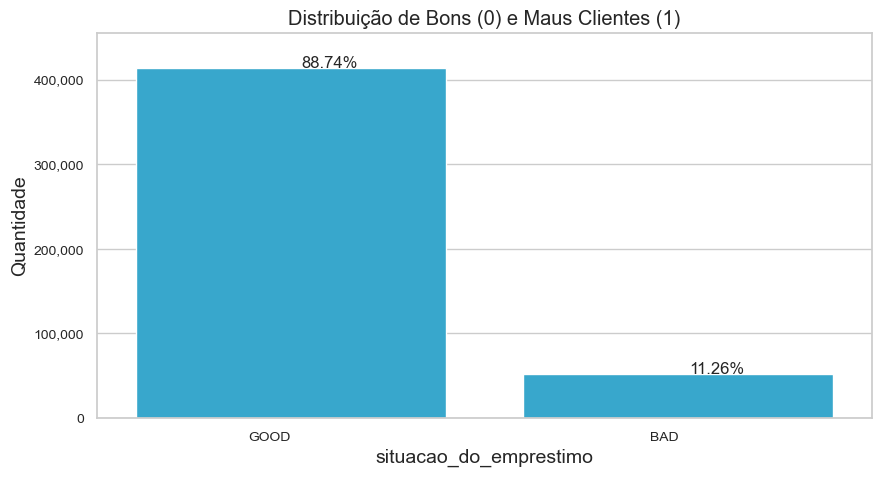

In [3]:
df['situacao_do_emprestimo'] = np.where(df['situacao_do_emprestimo'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']) | df['qt_contas_inadimplentes_outras_instituicoes'].fillna(0) != 0, 'BAD', 'GOOD') 
plota_barras(['situacao_do_emprestimo'], False, df, 1, 1, 'Distribuição de Bons (0) e Maus Clientes (1)', 0)

# <font color='green' style='font-size: 30px;'> 1.3) Separação em Treino e Teste </font>
<hr style='border: 2px solid green;'>

> 1. Antes de realizar qualquer análise ou modelagem, deve-se separar em Treino e Teste a fim de simular um ambiente real

> 2. Ao separar antes de qualquer alteração, evita-se um erro muito grave denominado Data leakage

> 3. As análises serão realizadas unicamente sobre a base de Treinamento, simulando um ambiente real no qual a priori a base de Teste seria inexistente 

In [4]:
df_train = separa_treino_teste('situacao_do_emprestimo', df, 0.20)[0]
df_test = separa_treino_teste('situacao_do_emprestimo', df, 0.20)[1]

print(f'Quantidade de Dados Utilizados para Treinamento: {df_train.shape[0]}')
print(f'Quantidade de Dados Utilizados para Teste: {df_test.shape[0]}')

Quantidade de Dados Utilizados para Treinamento: 373028
Quantidade de Dados Utilizados para Teste: 93257


# <font color='red' style='font-size: 40px;'> 2. Análise de Variáveis Referentes ao Cliente  </font>
<hr style='border: 2px solid red;'>

 ### Variáveis Referentes ao Cliente (VALIDADO)

 > 1. qt_anos_mesmo_emprego: Duração do emprego que ele está em anos, sendo que 0 significa menos de 1 ano e 10 significa dez ou mais anos (ANALISE REALIZADA)

 > 2. status_propriedade_residencial: Flag que indica o Status da propriedade residencial do cliente ao solicitar o empréstimo, podenso ser aluguel, próprio, hipoteca, outros. (ANALISE REALIZADA)

 > 3. renda_comprovada: Flag que indica se a renda foi comprovada, não comprovada (ANALISE REALIZADA)

 > 4. faturamento_anual: Renda anual declarada pelo cliente (ANALISE REALIZADA)

 > 5. estado: Estado do Cliente (ANALISE REALIZADA)

 > 6. limite_total_produtos_credito: Limite total considerando todos os produtos de crédito (ANALISE REALIZADA)

 > 7. limite_total_rotativos: Limite de rotativos total (ANALISE REALIZADA)
 
 > 8. limite_rotativos_utilizado: Limite de rotativos utilizado (ANALISE REALIZADA)

 > 9. taxa_utilizacao_limite_rotativos: Taxa de utilização de Limite de rotativos [limite_rotativos_utilizado/limite_total_rotativos] (ANALISE REALIZADA)

 > 10. qt_produtos_credito_contratados_atualmente: Número de produtos de crédito atualmente contratados no histórico do cliente (ANALISE REALIZADA)

 > 11. qt_produtos_credito_contratados_historicamente: Número total de produtos de crédito contratados no histórico do cliente (ANALISE REALIZADA)

 > 12. qt_registros_publicos_depreciativos: Número de registros públicos depreciativos (ANALISE REALIZADA)
 
 > 13. qt_consultas_credito_6meses: Número de consultas nos últimos 6 meses (excluindo consultas sobre automóveis e hipotecas) (ANALISE REALIZADA)

 > 14. data_contratacao_primeiro_produto_credito: Data em que o primeiro produto de crédito foi contratado pelo cliente (ANALISE REALIZADA)

 > 15. qt_meses_desde_ultimo_registro_publico: Número de meses desde o último registro público (ANALISE REALIZADA)

 > 16. qt_meses_classificacao_mais_recente_90dias: Meses desde a classificação mais recente de 90 dias ou menos (ANALISE REALIZADA)

 > 17. qt_meses_ultima_inadimplencia: O número de meses desde a última inadimplência do mutuário (ANALISE REALIZADA)

# <font color='green' style='font-size: 30px;'> 2.1) Número de Anos no emprego atual vs Target </font>
<hr style='border: 2px solid green;'>

> 1. O teste do Chi-Quadrado prova que há associação e o WOE mostra que clientes que estão há menos tempo em seus empregos possuem maior risco.

> 2. Talvez isso ocorra pois a pessoa ainda não tenha se estabilizado na empresa ou ainda não tenha cargos mais altos, portanto, possui salário um pouco menor

Pelo Teste Qui-Quadrado, há associação significativa entre qt_anos_mesmo_emprego e situacao_do_emprestimo.


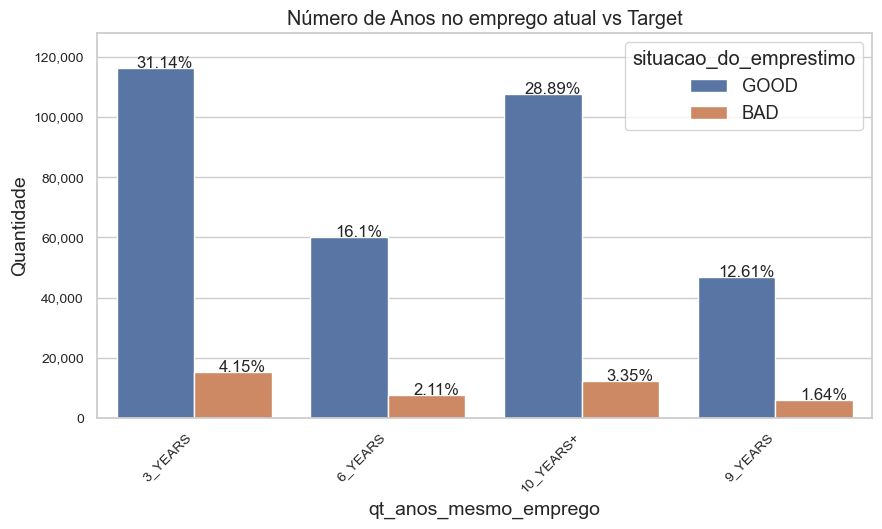

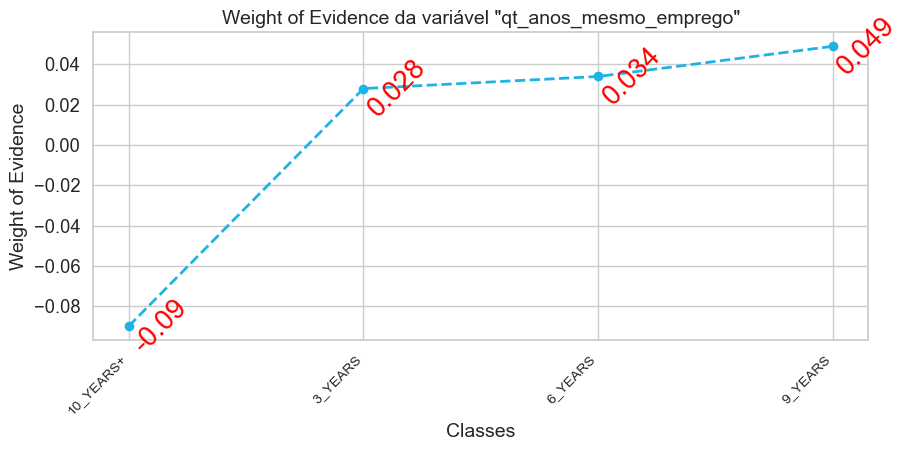

In [5]:
df_aux = df_train[['qt_anos_mesmo_emprego', 'situacao_do_emprestimo']].copy()
df_aux['qt_anos_mesmo_emprego'] = (df_aux['qt_anos_mesmo_emprego'].replace({'< 1 year':0, '1 year':1, '2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7, '8 years':8, '9 years':9,'10+ years':10}).fillna(0))
df_aux['qt_anos_mesmo_emprego'] = df_aux['qt_anos_mesmo_emprego'].apply(lambda x:int(x))
df_aux['qt_anos_mesmo_emprego'] = np.where(df_aux['qt_anos_mesmo_emprego'] <= 3, '3_YEARS', 
                       np.where(df_aux['qt_anos_mesmo_emprego'] <= 6, '6_YEARS',
                       np.where(df_aux['qt_anos_mesmo_emprego'] <= 9, '9_YEARS',
                       '10_YEARS+')))
teste_hipotese_duas_variaveis_categoricas(df_aux, 'qt_anos_mesmo_emprego', 'situacao_do_emprestimo')
plota_barras(['qt_anos_mesmo_emprego'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Número de Anos no emprego atual vs Target', 45)
woe(df_aux, 'qt_anos_mesmo_emprego', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.2) Tipo de Residência vs Target </font>
<hr style='border: 2px solid green;'>

> 1. O tipo de residência aparenta ser uma variável com poder discriminativo

> 2. Baseando-se nas categorias Mortgage, Rent e Own, as quais são as únicas que possuem volumetria considerável, percebe-se pelo WOE que clientes de uma casa com Mortgage tendem a oferecer menor risco de inadimplência

Pelo Teste Qui-Quadrado, há associação significativa entre status_propriedade_residencial e situacao_do_emprestimo.


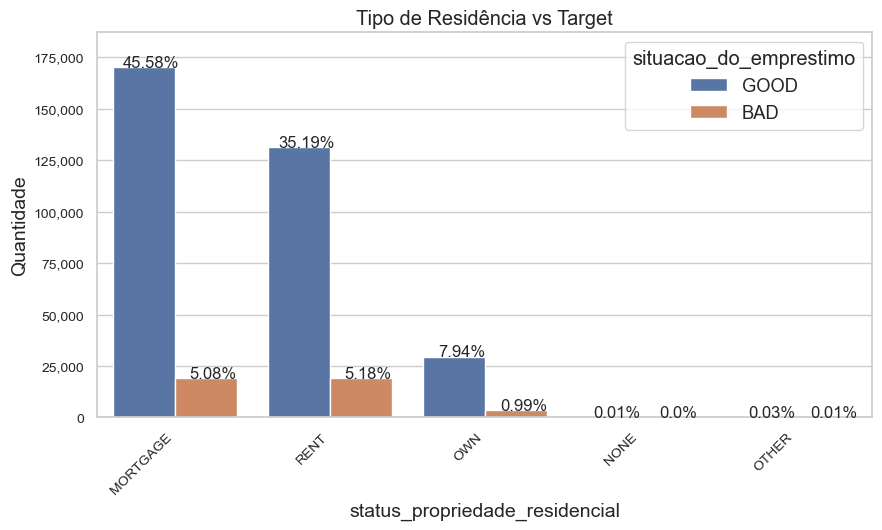

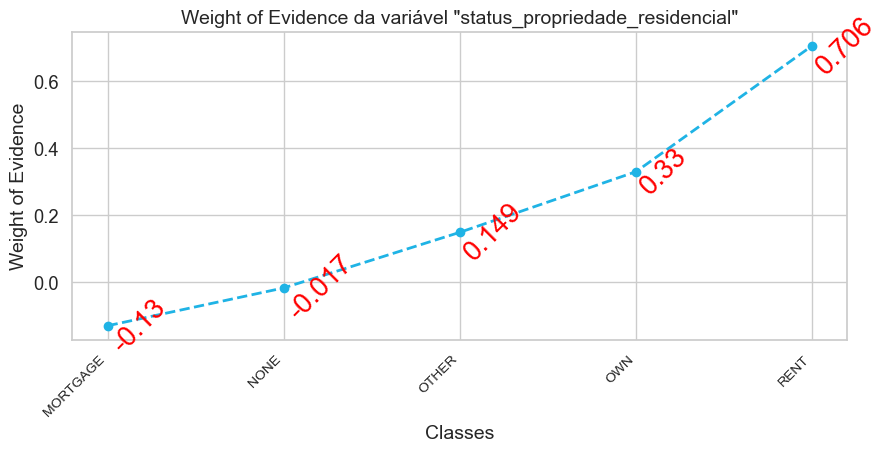

In [6]:
df_aux = df_train.loc[df_train['status_propriedade_residencial'] != 'ANY'][['status_propriedade_residencial', 'situacao_do_emprestimo']].copy()
teste_hipotese_duas_variaveis_categoricas(df_aux, 'status_propriedade_residencial', 'situacao_do_emprestimo')
plota_barras(['status_propriedade_residencial'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'status_propriedade_residencial', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.3) Comprovação de Renda vs Target </font>
<hr style='border: 2px solid green;'>

> 1. A comprovação de renda é uma variável com forte poder de discriminação

> 2. Clientes de renda comprovada demonstram maior confiabilidade, portanto, o risco de inadimplência torna-se menor nestes casos.

Pelo Teste Qui-Quadrado, há associação significativa entre renda_comprovada e situacao_do_emprestimo.


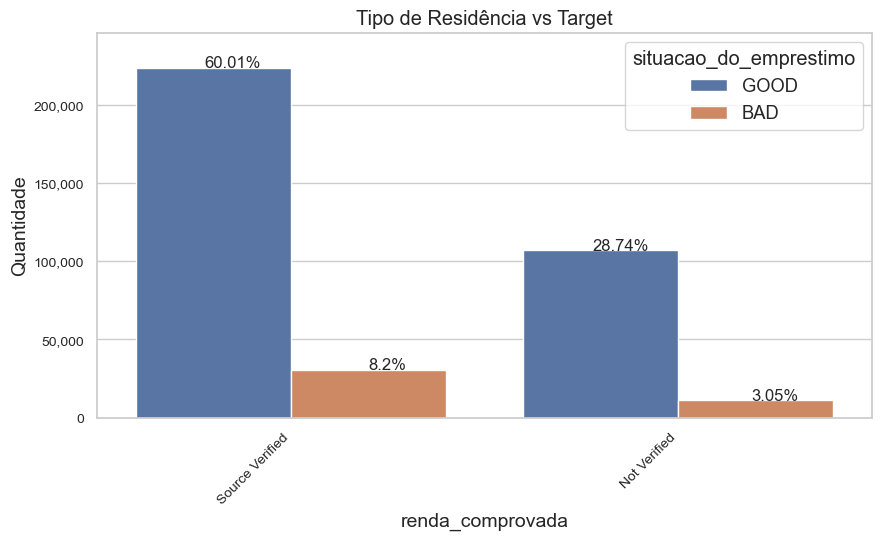

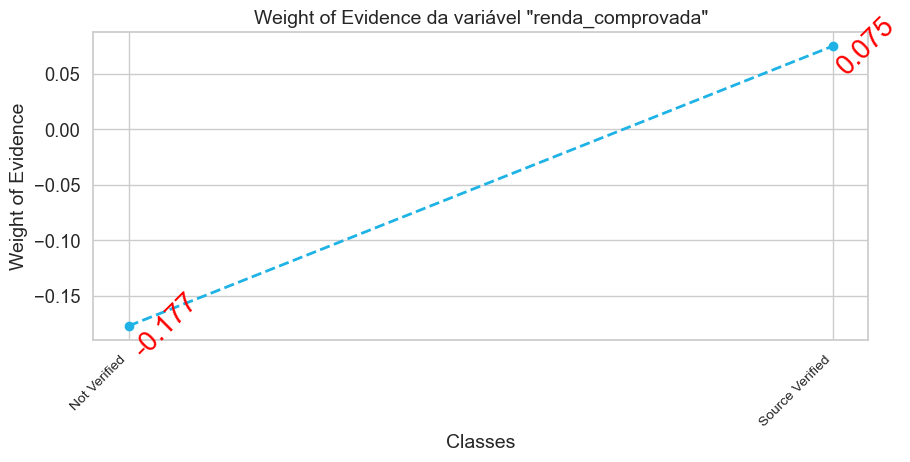

In [7]:
df_aux = df_train[['renda_comprovada', 'situacao_do_emprestimo']].copy()
df_aux['renda_comprovada'] = np.where(df_aux['renda_comprovada'].isin(['Not Verified']), 'Not Verified', 'Source Verified')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'renda_comprovada', 'situacao_do_emprestimo')
plota_barras(['renda_comprovada'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Tipo de Residência vs Target', 45)
woe(df_aux, 'renda_comprovada', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.4) Distribuição do ganho anual vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Como esperado, pessoas com maior faturamento tendem a ter menor inadimplência.

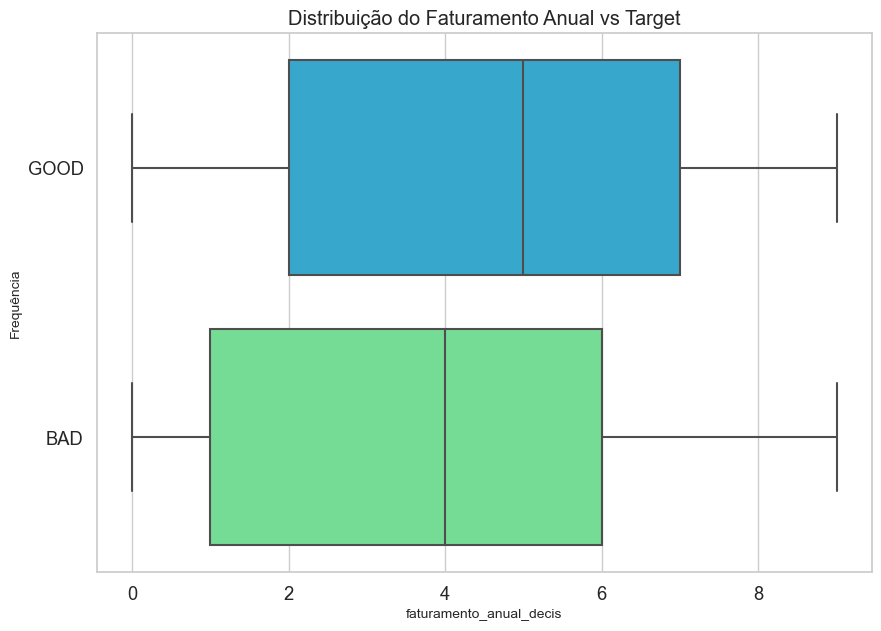

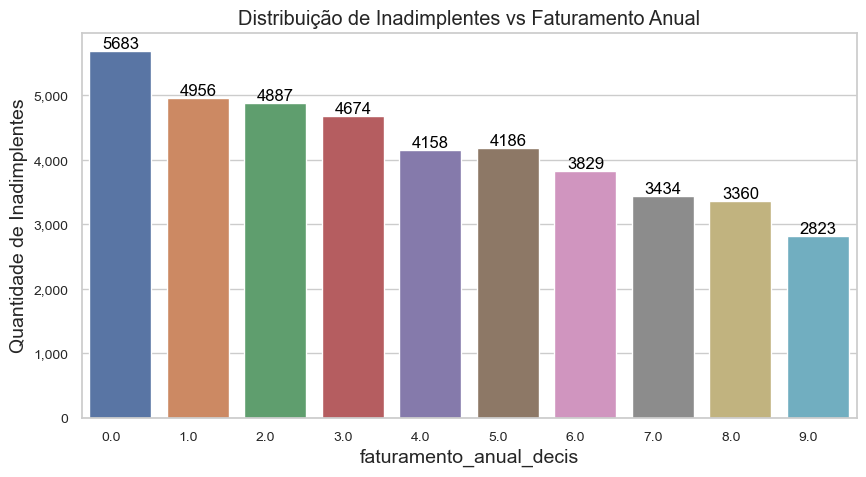

In [8]:
df_aux = df_train[['situacao_do_emprestimo', 'faturamento_anual']].copy()
df_aux['faturamento_anual_decis'] = transform_to_deciles(df_aux, 'faturamento_anual')
plota_boxplot(['faturamento_anual_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição do Faturamento Anual vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('faturamento_anual_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('faturamento_anual_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'faturamento_anual_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'faturamento_anual_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Faturamento Anual')

# <font color='green' style='font-size: 30px;'> 2.5) Distribuição do Limite Total vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Assim como o faturamento, pessoas com maior limite tendem a ter menor inadimplência.

> 2. Na visão de limite de rotativos (limite de cartão de crédito + cheque especial), nota-se esse comportamento nos decis mais altos, ou seja, quem possui grande limite de rotativos

> 3. Todavia, uma informação muito interessante é referente a taxa de utilização de limite de rotativos, a qual mostra que os clientes que utilizam grande parte do seu limite costumam dar mais inadimplências.

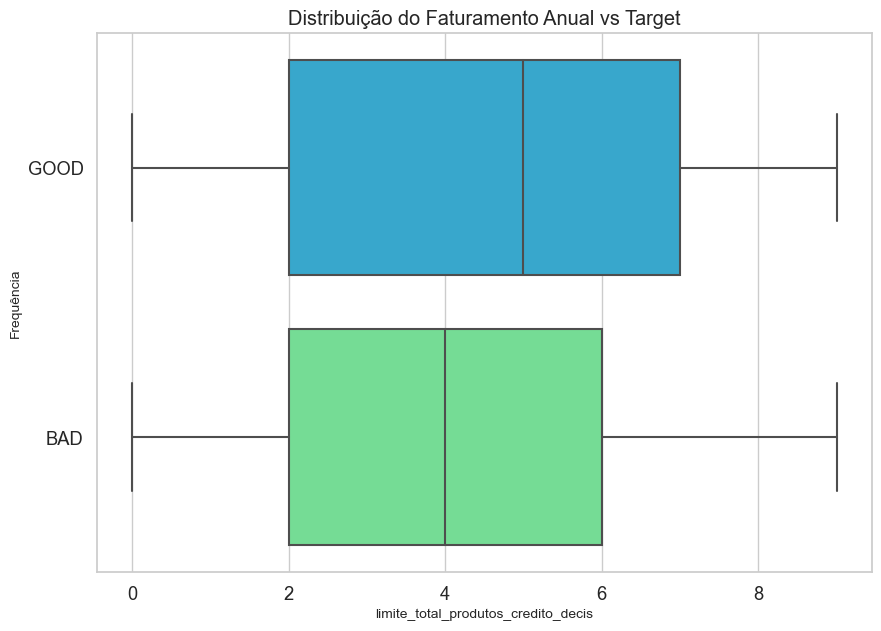

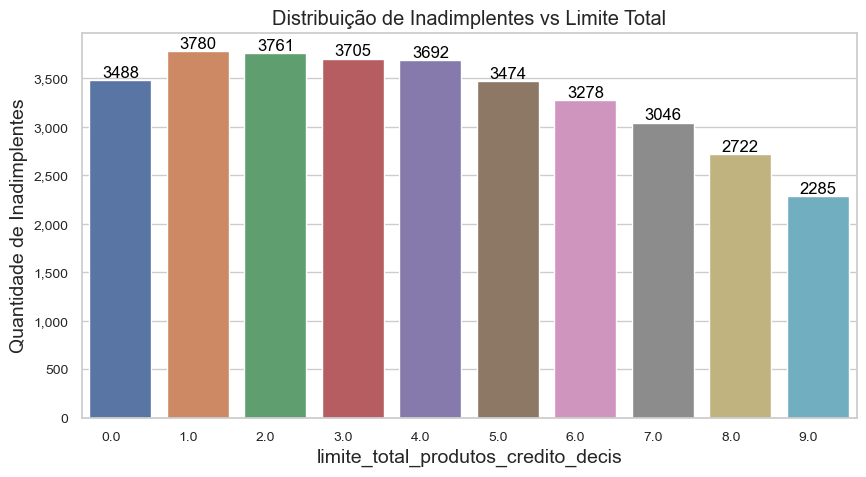

In [9]:
df_aux = df_train[['situacao_do_emprestimo', 'limite_total_produtos_credito']].copy()
df_aux['limite_total_produtos_credito_decis'] = transform_to_deciles(df_aux, 'limite_total_produtos_credito')
plota_boxplot(['limite_total_produtos_credito_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição do Faturamento Anual vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('limite_total_produtos_credito_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('limite_total_produtos_credito_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'limite_total_produtos_credito_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'limite_total_produtos_credito_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Limite Total')

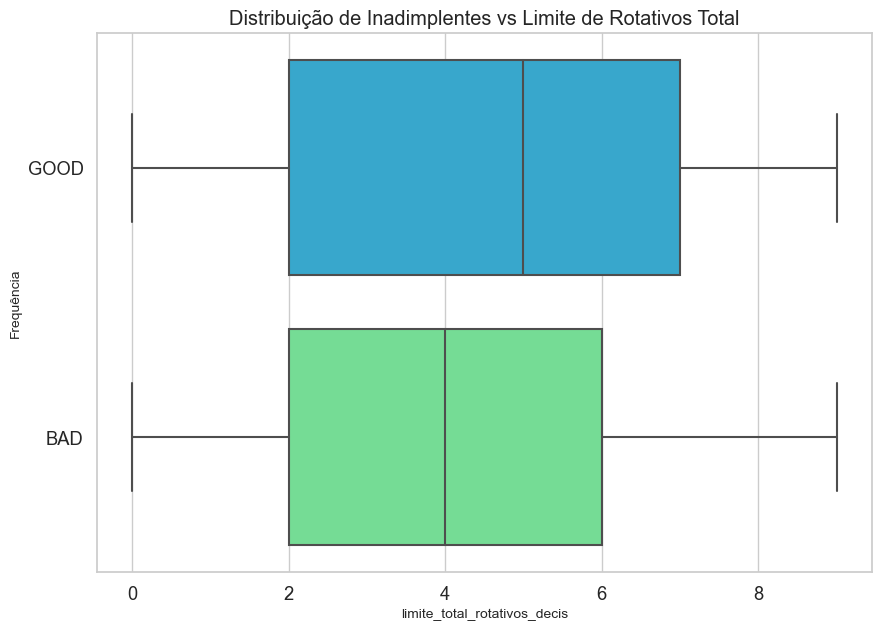

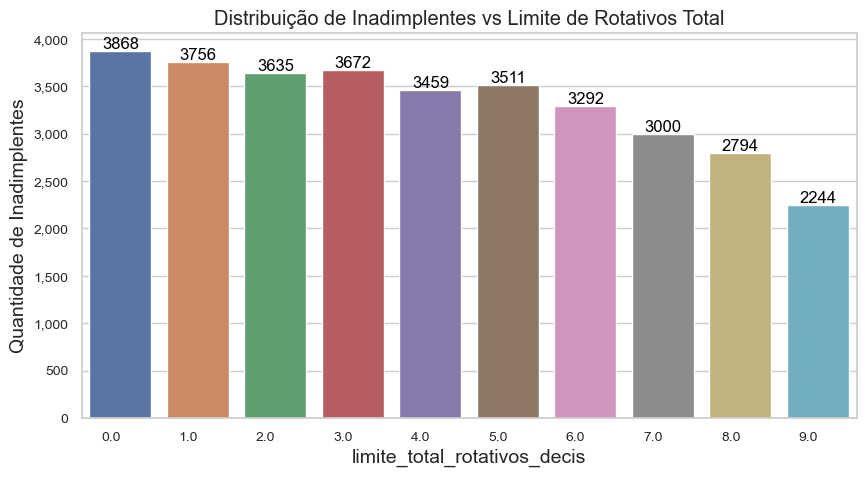

In [10]:
df_aux = df_train[['situacao_do_emprestimo', 'limite_total_rotativos']].copy()
df_aux['limite_total_rotativos_decis'] = transform_to_deciles(df_aux, 'limite_total_rotativos')
plota_boxplot(['limite_total_rotativos_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Limite de Rotativos Total')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('limite_total_rotativos_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('limite_total_rotativos_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'limite_total_rotativos_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'limite_total_rotativos_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Limite de Rotativos Total')

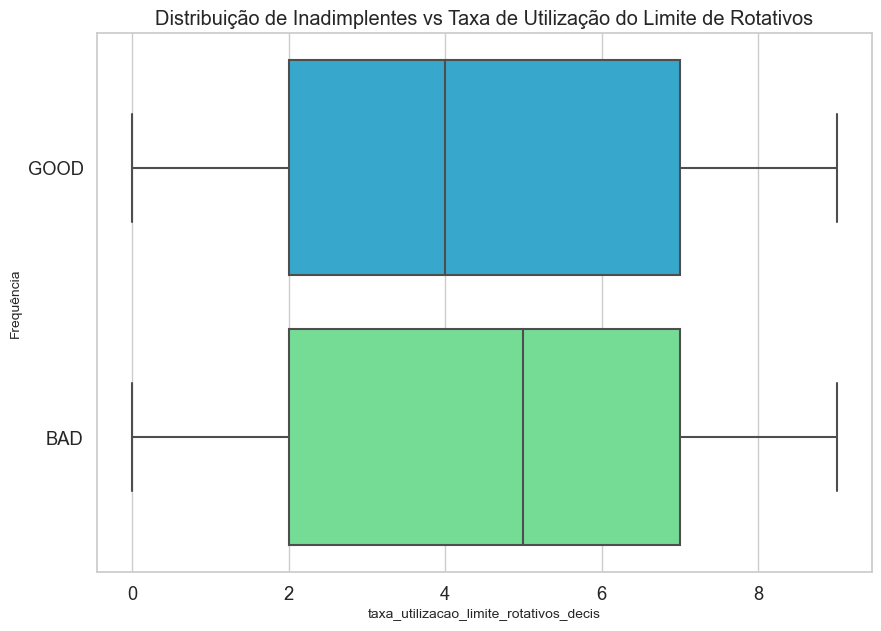

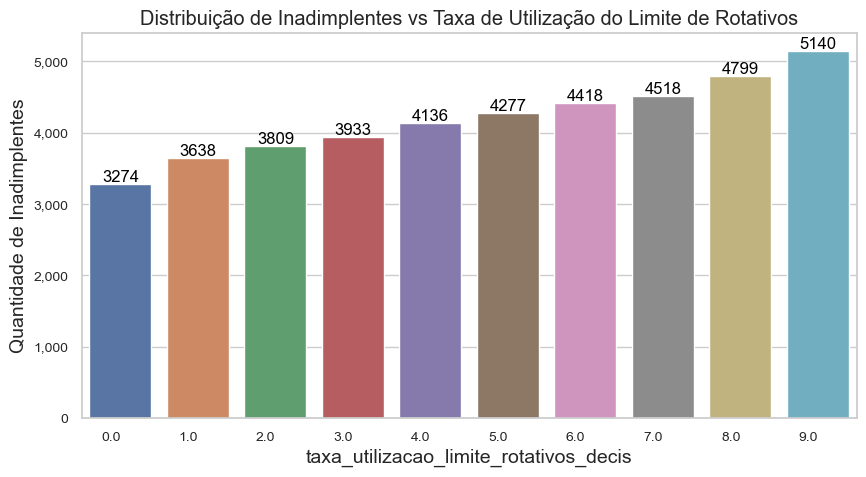

In [11]:
df_aux = df_train[['situacao_do_emprestimo', 'taxa_utilizacao_limite_rotativos']].copy()
df_aux['taxa_utilizacao_limite_rotativos_decis'] = transform_to_deciles(df_aux, 'taxa_utilizacao_limite_rotativos')
plota_boxplot(['taxa_utilizacao_limite_rotativos_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Taxa de Utilização do Limite de Rotativos')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('taxa_utilizacao_limite_rotativos_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('taxa_utilizacao_limite_rotativos_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'taxa_utilizacao_limite_rotativos_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'taxa_utilizacao_limite_rotativos_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Taxa de Utilização do Limite de Rotativos')

# <font color='green' style='font-size: 30px;'> 2.6) Distribuição do Número de Produtos Contratados vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Em relação ao número de produtos contratados atualmente, nota-se que não há ordenação nos decis, portanto, o fato do cliente ter diversos produtos de crédito contratados simultaneamente não necessariamente significa que ele ficará inadimplente. Na realidade, pode ser que pessoas com maior renda, limite e etc...contratam muitos produtos de uma só vez pois elas tem condições para pagá-los

> 2. Em relação ao número de produtos contratados historicamente, não se nota uma ordenação clara, todavia, clientes concetrados no decil 0 possuem maior inadimplência. O que justificaria isso provavelmente seria que eles são clientes novos e ainda não contrataram muitos produtos, logo, não se sabe muito sobre seu comportamento e, portanto, podemos ter errado ao conceder crédito a alguns.

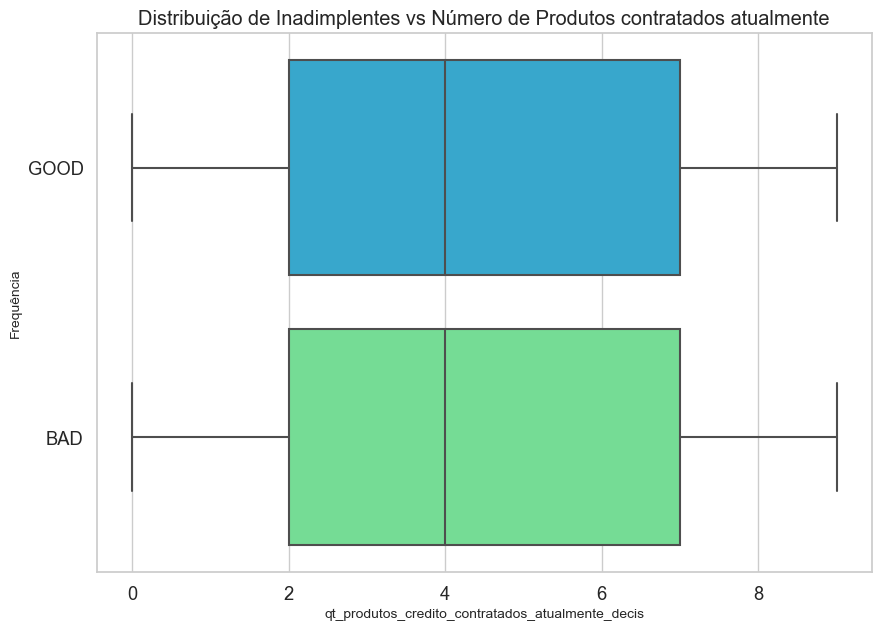

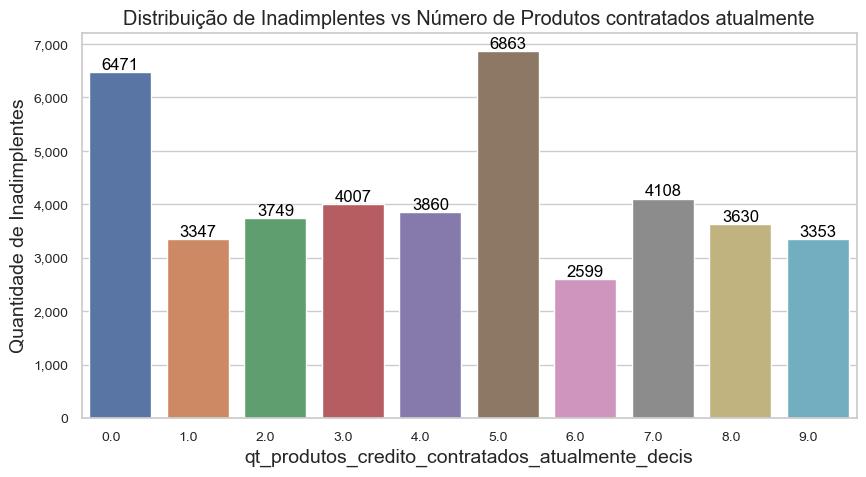

In [12]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_produtos_credito_contratados_atualmente']].copy()
df_aux['qt_produtos_credito_contratados_atualmente_decis'] = transform_to_deciles(df_aux, 'qt_produtos_credito_contratados_atualmente')
plota_boxplot(['qt_produtos_credito_contratados_atualmente_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Número de Produtos contratados atualmente')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('qt_produtos_credito_contratados_atualmente_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('qt_produtos_credito_contratados_atualmente_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'qt_produtos_credito_contratados_atualmente_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'qt_produtos_credito_contratados_atualmente_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Número de Produtos contratados atualmente')

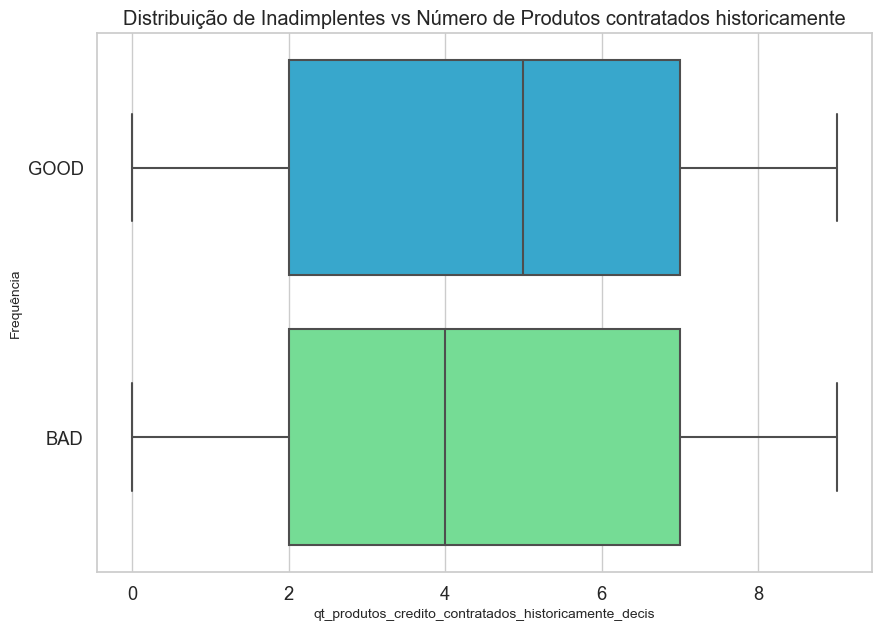

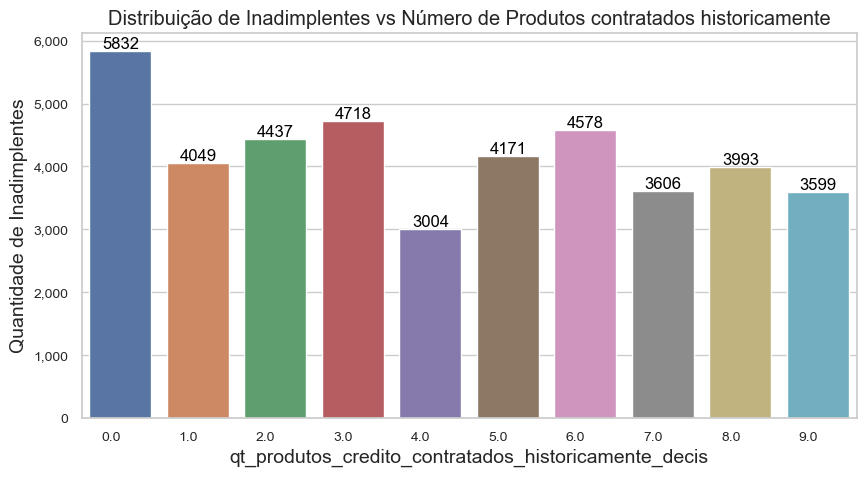

In [13]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_produtos_credito_contratados_historicamente']].copy()
df_aux['qt_produtos_credito_contratados_historicamente_decis'] = transform_to_deciles(df_aux, 'qt_produtos_credito_contratados_historicamente')
plota_boxplot(['qt_produtos_credito_contratados_historicamente_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição de Inadimplentes vs Número de Produtos contratados historicamente')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('qt_produtos_credito_contratados_historicamente_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('qt_produtos_credito_contratados_historicamente_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'qt_produtos_credito_contratados_historicamente_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'qt_produtos_credito_contratados_historicamente_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Número de Produtos contratados historicamente')

# <font color='green' style='font-size: 30px;'> 2.7) Número de Registros Públicos Negativos vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Pessoas com registros negativos tendem a dar maior risco de inadimplência

Pelo Teste Qui-Quadrado, há associação significativa entre qt_registros_publicos_depreciativos e situacao_do_emprestimo.


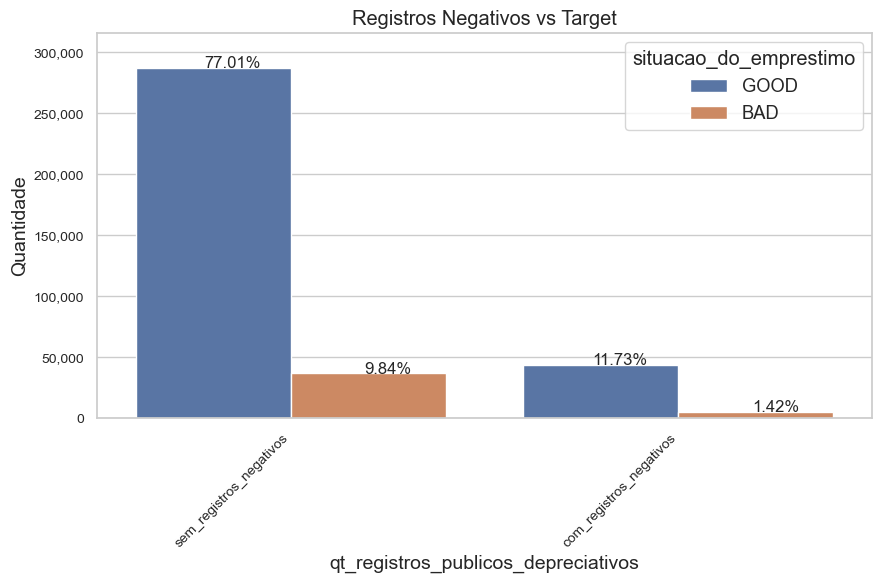

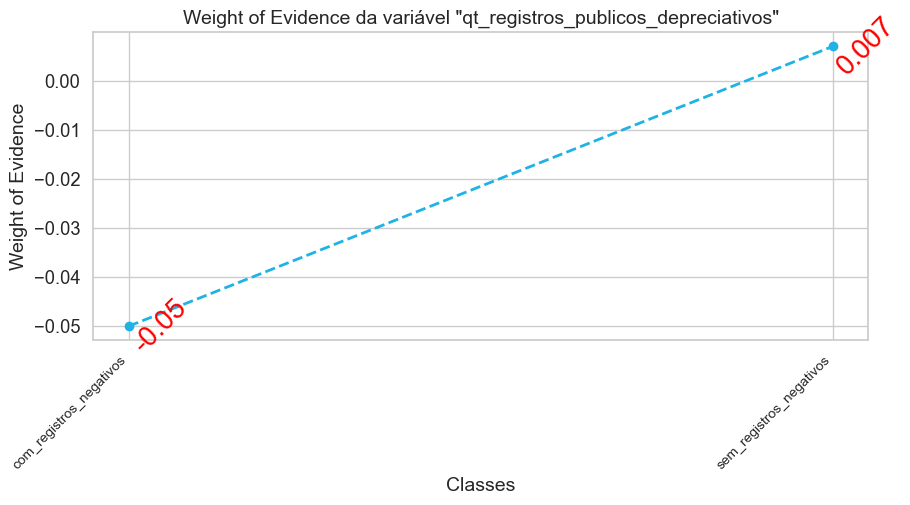

In [14]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_registros_publicos_depreciativos']].copy()
df_aux[['qt_registros_publicos_depreciativos']] = np.where(df_aux[['qt_registros_publicos_depreciativos']] == 0, 'sem_registros_negativos', 'com_registros_negativos')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'qt_registros_publicos_depreciativos', 'situacao_do_emprestimo')
plota_barras(['qt_registros_publicos_depreciativos'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Registros Negativos vs Target', 45)
woe(df_aux, 'qt_registros_publicos_depreciativos', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.8) Consultas de Crédito nos Últimos 6 Meses vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Clientes que realizaram consultas de crédito nos últimos 6 meses tendem a dar menor risco de crédito, pois provavelmente são pessoas interessadas e que vem se planejando há algum tempo

Pelo Teste Qui-Quadrado, há associação significativa entre qt_consultas_credito_6meses e situacao_do_emprestimo.


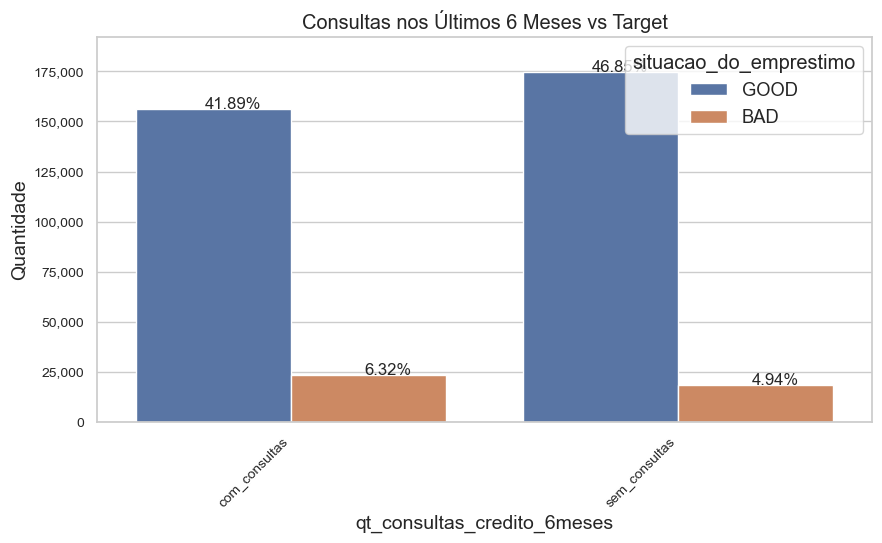

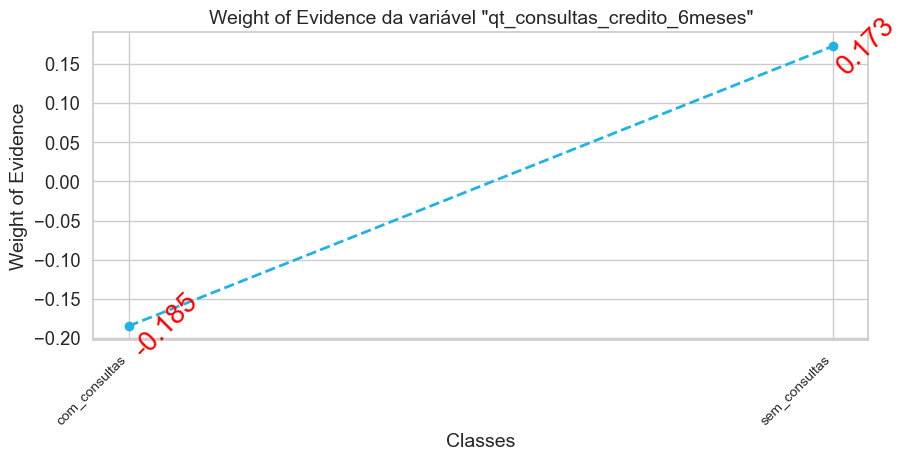

In [15]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_consultas_credito_6meses']].copy()
df_aux[['qt_consultas_credito_6meses']] = np.where(df_aux[['qt_consultas_credito_6meses']] == 0, 'sem_consultas', 'com_consultas')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'qt_consultas_credito_6meses', 'situacao_do_emprestimo')
plota_barras(['qt_consultas_credito_6meses'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Consultas nos Últimos 6 Meses vs Target', 45)
woe(df_aux, 'qt_consultas_credito_6meses', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.9) O número de incidências de inadimplência vencidas há mais de 30 dias no arquivo de crédito do mutuário nos últimos 2 anos vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente clientes com inadimplência vencida proporcionam maior risco.

Pelo Teste Qui-Quadrado, há associação significativa entre qt_incidencias_inadimplencia_vencidas_30dias e situacao_do_emprestimo.


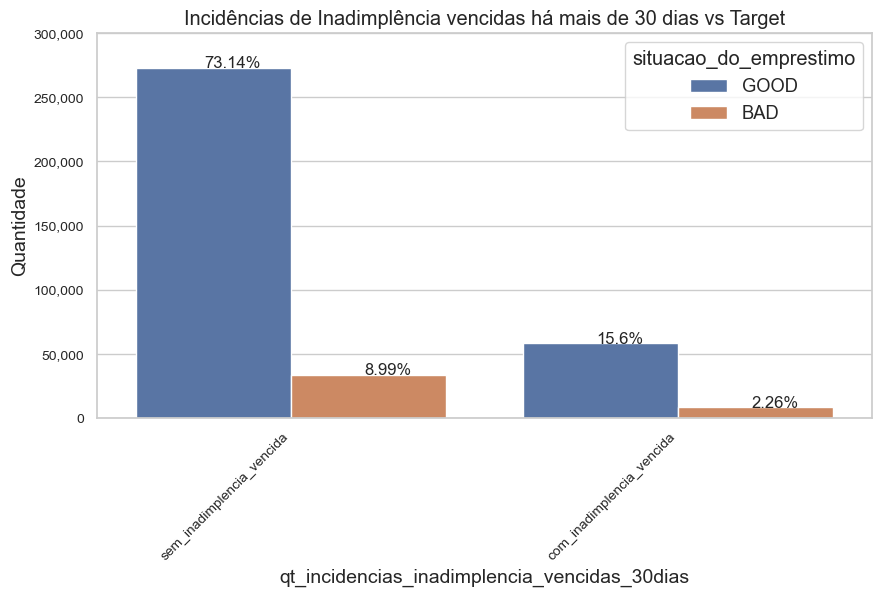

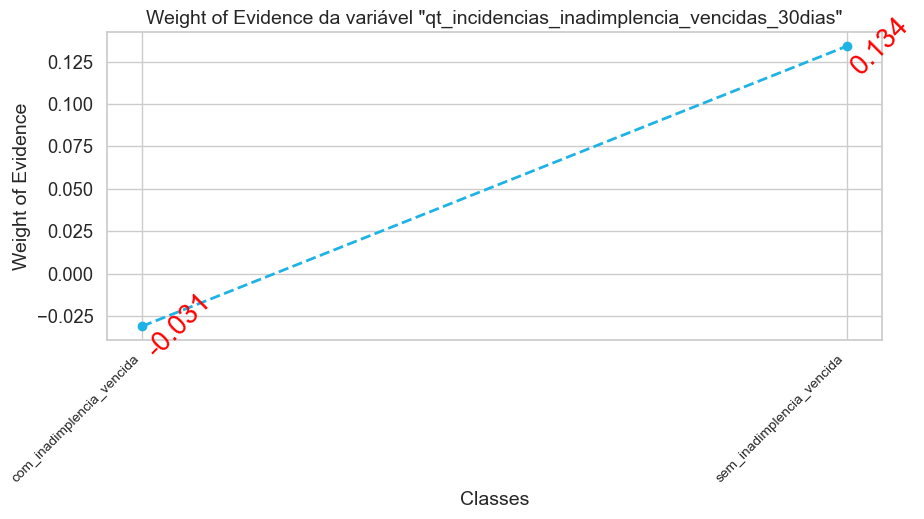

In [16]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_incidencias_inadimplencia_vencidas_30dias']].copy()
df_aux[['qt_incidencias_inadimplencia_vencidas_30dias']] = np.where(df_aux[['qt_incidencias_inadimplencia_vencidas_30dias']] == 0, 'sem_inadimplencia_vencida', 'com_inadimplencia_vencida')
teste_hipotese_duas_variaveis_categoricas(df_aux, 'qt_incidencias_inadimplencia_vencidas_30dias', 'situacao_do_emprestimo')
plota_barras(['qt_incidencias_inadimplencia_vencidas_30dias'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Incidências de Inadimplência vencidas há mais de 30 dias vs Target', 45)
woe(df_aux, 'qt_incidencias_inadimplencia_vencidas_30dias', 'situacao_do_emprestimo')

# <font color='green' style='font-size: 30px;'> 2.10) Número de meses desde a contratação do primeiro produto de crédito vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente clientes mais antigos tendem a proporcionar menor risco.

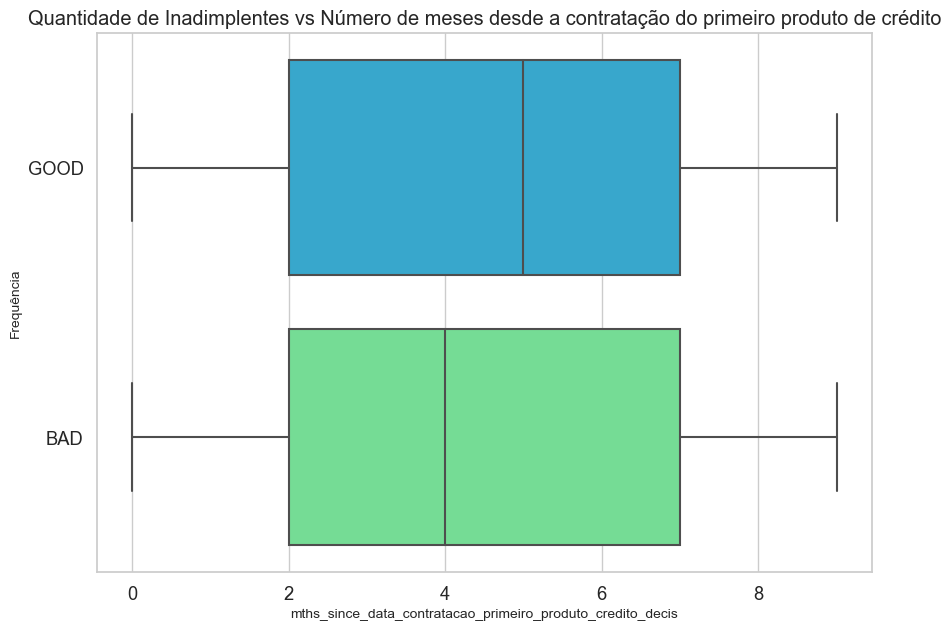

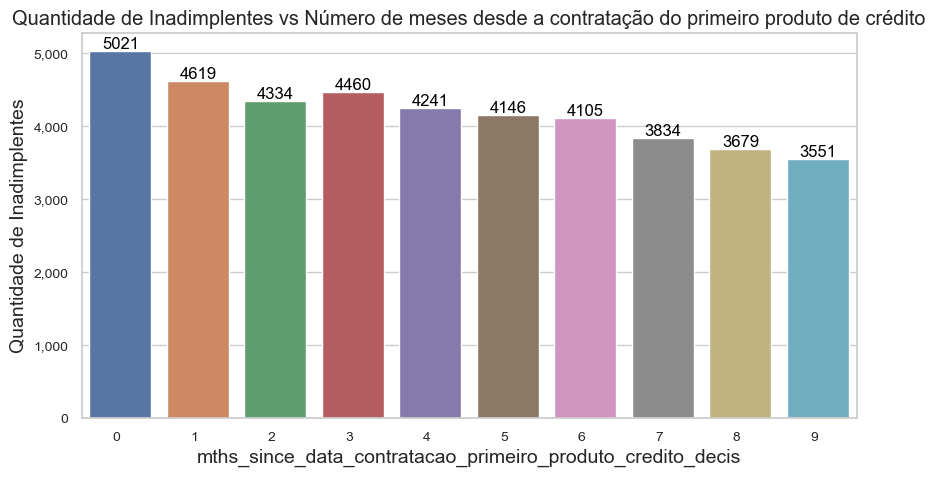

In [17]:
df_aux = df_train[['situacao_do_emprestimo', 'data_contratacao_primeiro_produto_credito']].copy()
df_aux['data_contratacao_primeiro_produto_credito'] = pd.to_datetime(df_aux['data_contratacao_primeiro_produto_credito'], format = '%b-%y')
df_aux['mths_since_data_contratacao_primeiro_produto_credito'] = round(pd.to_numeric((pd.to_datetime('2023-09-20') - df_aux['data_contratacao_primeiro_produto_credito'])/np.timedelta64(1, 'M')))
df_aux['mths_since_data_contratacao_primeiro_produto_credito'] = df_aux['mths_since_data_contratacao_primeiro_produto_credito'].fillna(df_aux['mths_since_data_contratacao_primeiro_produto_credito'].median())
df_aux['mths_since_data_contratacao_primeiro_produto_credito'] = np.where(df_aux['mths_since_data_contratacao_primeiro_produto_credito'] < 0, df_aux['mths_since_data_contratacao_primeiro_produto_credito'].median(), df_aux['mths_since_data_contratacao_primeiro_produto_credito'])
df_aux['mths_since_data_contratacao_primeiro_produto_credito'] = df_aux['mths_since_data_contratacao_primeiro_produto_credito'].apply(lambda x:int(x))
df_aux['mths_since_data_contratacao_primeiro_produto_credito_decis'] = transform_to_deciles(df_aux, 'mths_since_data_contratacao_primeiro_produto_credito')
plota_boxplot(['mths_since_data_contratacao_primeiro_produto_credito_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde a contratação do primeiro produto de crédito')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('mths_since_data_contratacao_primeiro_produto_credito_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('mths_since_data_contratacao_primeiro_produto_credito_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'mths_since_data_contratacao_primeiro_produto_credito_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'mths_since_data_contratacao_primeiro_produto_credito_decis', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a contratação do primeiro produto de crédito')

# <font color='green' style='font-size: 30px;'> 2.11) Número de Meses desde o último Registro público vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente o número de meses desde o último registro público não é uma informação capaz de discriminar clientes bons e ruins

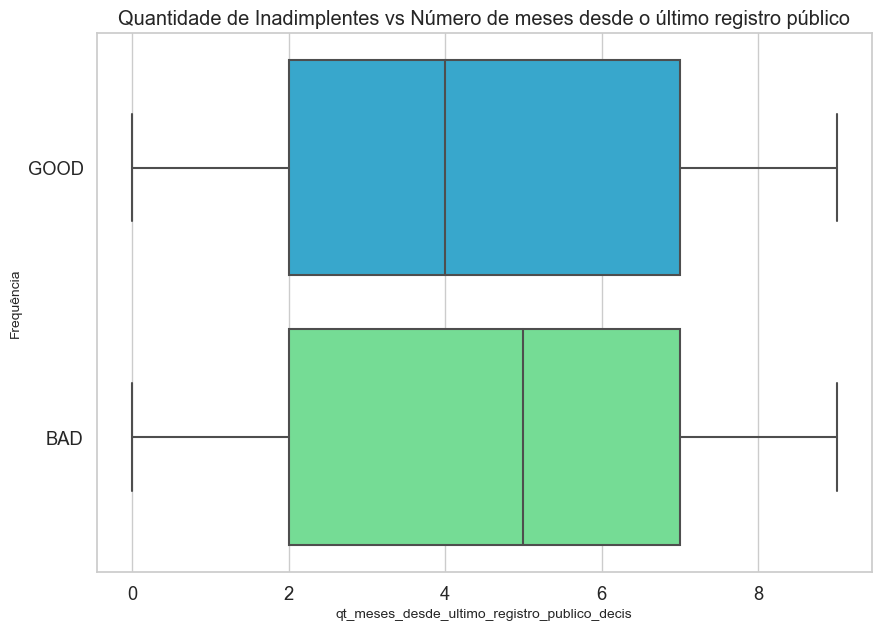

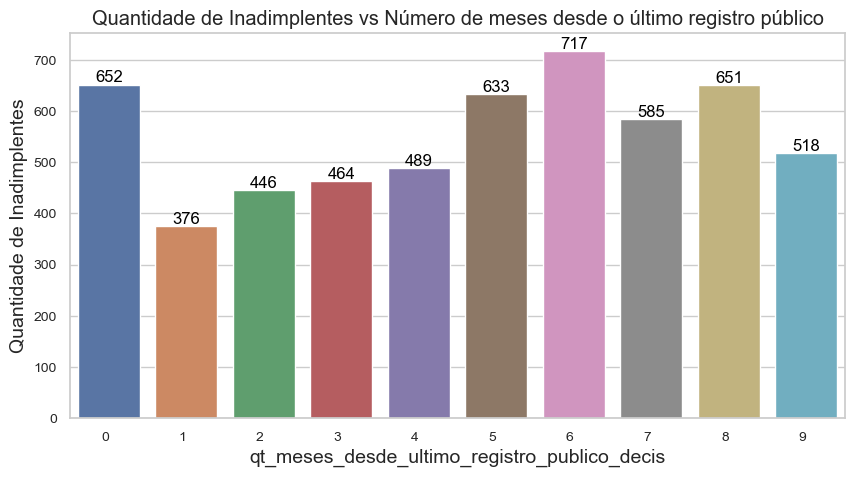

In [18]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_meses_desde_ultimo_registro_publico']].copy()
df_aux.dropna(inplace = True)
df_aux['qt_meses_desde_ultimo_registro_publico_decis'] = transform_to_deciles(df_aux, 'qt_meses_desde_ultimo_registro_publico')
plota_boxplot(['qt_meses_desde_ultimo_registro_publico_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde o último registro público')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('qt_meses_desde_ultimo_registro_publico_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('qt_meses_desde_ultimo_registro_publico_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'qt_meses_desde_ultimo_registro_publico_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'qt_meses_desde_ultimo_registro_publico_decis', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde o último registro público')

# <font color='green' style='font-size: 30px;'> 2.12) Número de Meses desde a classificação mais recente de 90 dias ou menos vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Dentre os clientes com essa informação, aparentemente clientes classificados recentemente aparentam ter maior risco de inadimplência

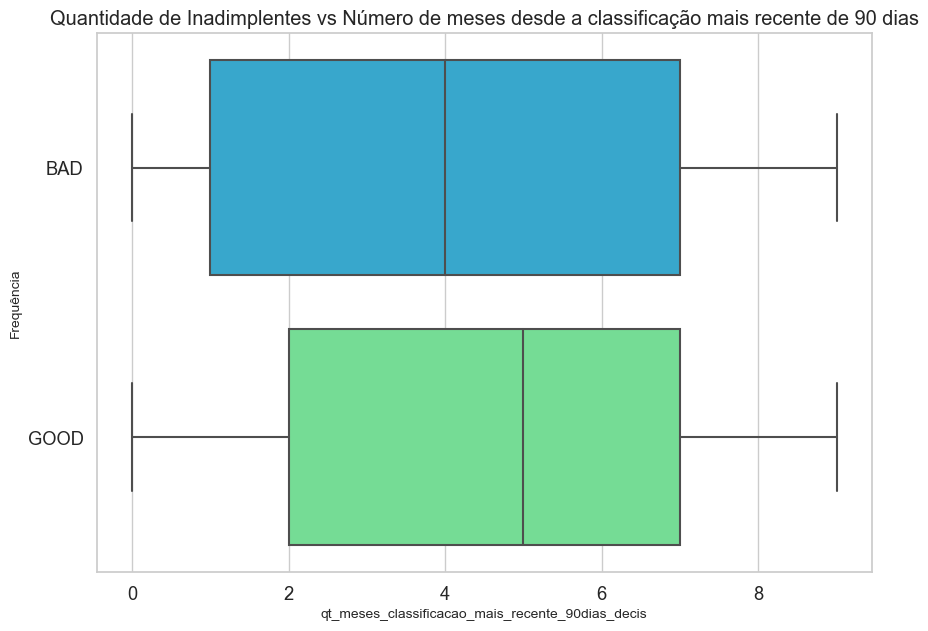

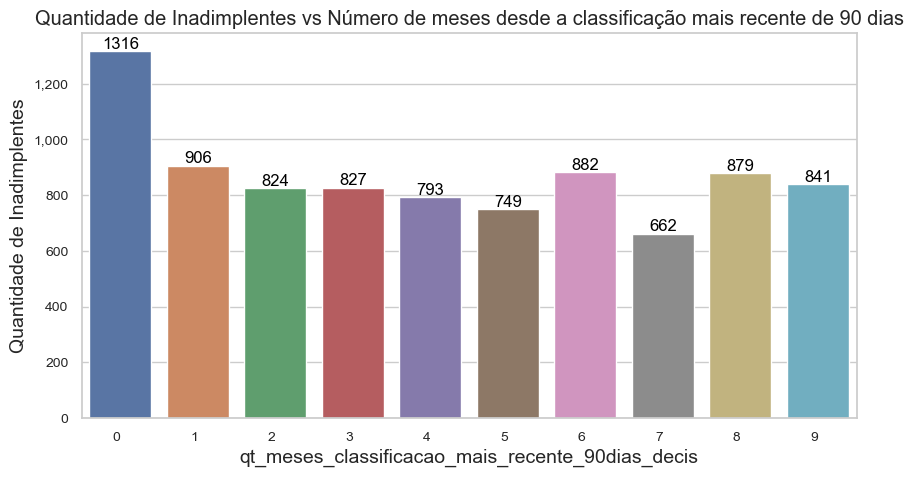

In [19]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_meses_classificacao_mais_recente_90dias']].copy()
df_aux.dropna(inplace = True)
df_aux['qt_meses_classificacao_mais_recente_90dias_decis'] = transform_to_deciles(df_aux, 'qt_meses_classificacao_mais_recente_90dias')
plota_boxplot(['qt_meses_classificacao_mais_recente_90dias_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Quantidade de Inadimplentes vs Número de meses desde a classificação mais recente de 90 dias')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('qt_meses_classificacao_mais_recente_90dias_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('qt_meses_classificacao_mais_recente_90dias_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'qt_meses_classificacao_mais_recente_90dias_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'qt_meses_classificacao_mais_recente_90dias_decis', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a classificação mais recente de 90 dias')

# <font color='green' style='font-size: 30px;'> 2.13) Número de meses desde a última inadimplência vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Aparentemente o número de meses desde a última inadimplência não aparenta caráter discriminatório de forma geral, a não ser pelo decil 0.

> 2. No decil 0, há muito mais clientes com inadimplência. Isso se deve talvez pelo fato da própria montagem da Target captar esse efeito para inadimplência recentes e para inadimplências antigas provavelmente o cliente já se recuperou e pode-se realizar negócios novamente com ele

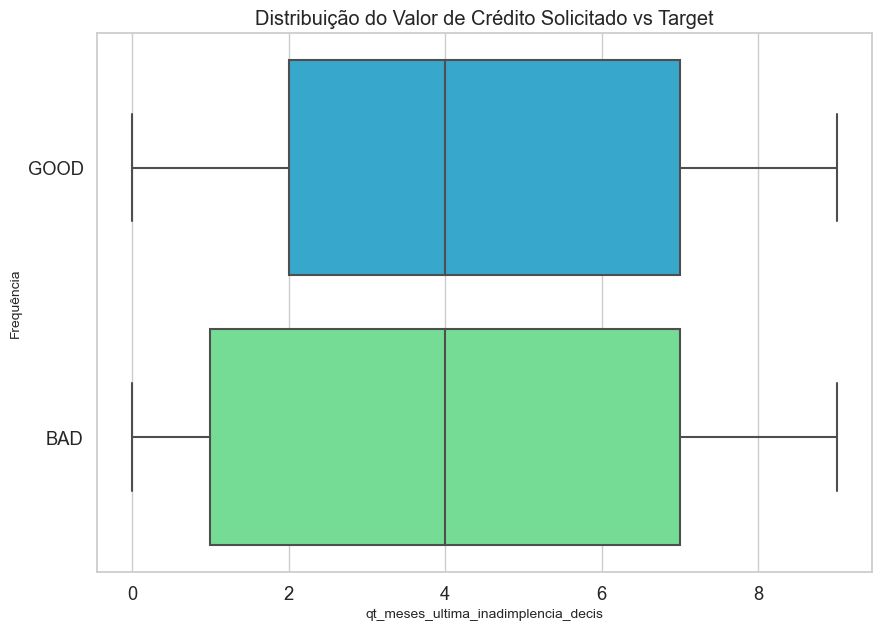

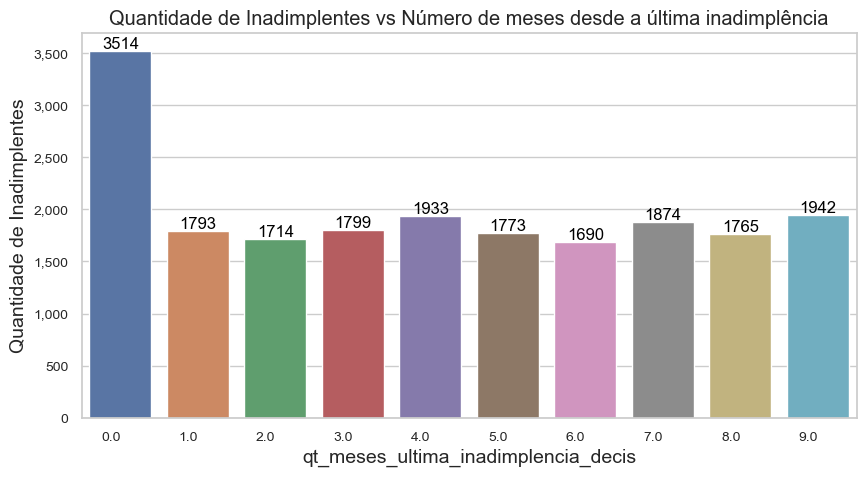

In [20]:
df_aux = df_train[['situacao_do_emprestimo', 'qt_meses_ultima_inadimplencia']].copy()
df_aux = df_aux.loc[~df_aux['qt_meses_ultima_inadimplencia'].isnull()]
df_aux['qt_meses_ultima_inadimplencia_decis'] = transform_to_deciles(df_train, 'qt_meses_ultima_inadimplencia')
plota_boxplot(['qt_meses_ultima_inadimplencia_decis'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição do Valor de Crédito Solicitado vs Target')

good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('qt_meses_ultima_inadimplencia_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('qt_meses_ultima_inadimplencia_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'qt_meses_ultima_inadimplencia_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'qt_meses_ultima_inadimplencia_decis', 'qt_bad', 'Quantidade de Inadimplentes vs Número de meses desde a última inadimplência')

# <font color='green' style='font-size: 30px;'> 2.14) Comprometimento de Renda vs Target</font>
<hr style='border: 2px solid green;'>

> 1. Pessoas com maior comprometimento de renda (pagamento anual/ganho anual) possuem maior risco de inadimplência

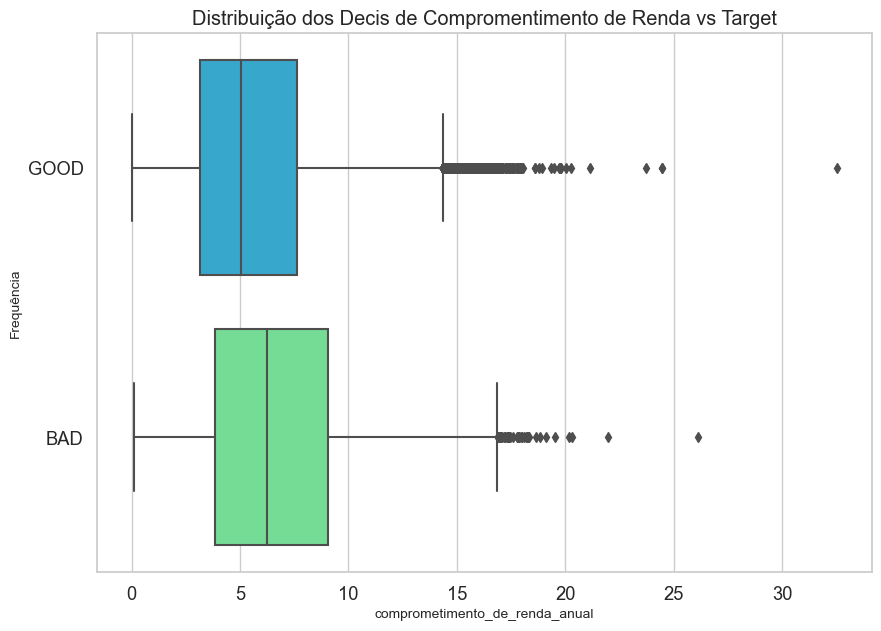

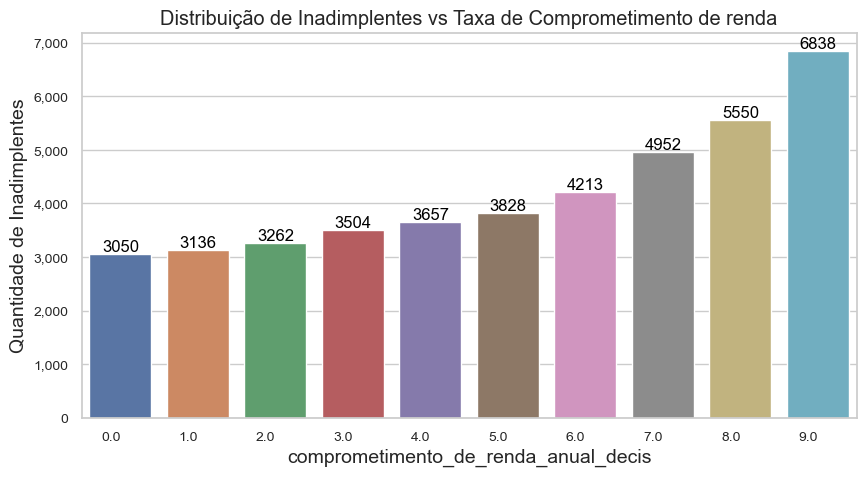

In [21]:
df_aux = df_train[['faturamento_anual', 'pagamento_mensal', 'valor_emprestimo_solicitado', 'qt_parcelas', 'taxa_de_juros', 'situacao_do_emprestimo']].copy()
df_aux['qt_parcelas'] = np.where(df_aux['qt_parcelas'] == ' 36 months', 36, 60)
df_aux['valor_emprestimo_solicitado_with_taxa_de_juros'] = df_aux['pagamento_mensal']*df_aux['qt_parcelas']
df_aux['annual_payment'] = np.where(df_aux['qt_parcelas'] == ' 36 months', df_aux['valor_emprestimo_solicitado_with_taxa_de_juros']/3, df_aux['valor_emprestimo_solicitado_with_taxa_de_juros']/5)
df_aux['comprometimento_de_renda_anual'] = ((df_aux['annual_payment']/df_aux['faturamento_anual'])*100).round(2)
df_aux['comprometimento_de_renda_anual_decis'] = transform_to_deciles(df_aux, 'comprometimento_de_renda_anual').fillna(0)
plota_boxplot(['comprometimento_de_renda_anual'], 'situacao_do_emprestimo', df_aux, 1, 1, 'Distribuição dos Decis de Compromentimento de Renda vs Target')
good = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'GOOD'].groupby('comprometimento_de_renda_anual_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_good'}, axis = 1)
bad = pd.DataFrame(df_aux.loc[df_aux['situacao_do_emprestimo'] == 'BAD'].groupby('comprometimento_de_renda_anual_decis', as_index = False)['situacao_do_emprestimo'].count()).rename({'situacao_do_emprestimo':'qt_bad'}, axis = 1)
df_aux = good.merge(bad, on = 'comprometimento_de_renda_anual_decis', how = 'left')
plota_barras_agrupadas(df_aux, 'comprometimento_de_renda_anual_decis', 'qt_bad', 'Distribuição de Inadimplentes vs Taxa de Comprometimento de renda')
